In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats
import pylab
import datetime
from time import time
import seaborn as sns
sns.set()

#time series Libraries
import statsmodels.graphics.tsaplots as sgrt 
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller

In [2]:
raw_csv_data = pd.read_csv("Complete_Sentech_Tower_Data.csv")

In [3]:
sentech_data= raw_csv_data.copy()

In [4]:
del sentech_data['_Normalized_Efield']
del sentech_data['_Normalized_Warnings']
del sentech_data['Rain']
del sentech_data['Pressure']
del sentech_data['Date']
del sentech_data['Reset_secs']

In [5]:
sentech_data

,Air_temp,RH,DewPoint,Efield,Lightning_Warnings
0,18.83013,44.34569,6.449132,-31.68846,0.0
1,15.88538,60.16803,8.188042,-23.84491,0.0
2,15.17229,67.91439,9.302760,-23.84614,0.0
3,14.64727,71.04126,9.468879,-23.22135,0.0
4,14.49834,72.94492,9.719332,-23.84927,0.0
...,...,...,...,...,...
11419,16.28638,76.22140,12.107980,-14.43517,0.0
11420,15.94644,79.59342,12.436280,-15.37659,0.0
11421,15.81320,81.01760,12.576650,-17.25920,0.0
11422,15.98598,82.16581,12.960260,-17.88704,0.0


In [6]:
#Convert float binary numbers to int
sentech_data['Lightning_Warnings'] = sentech_data['Lightning_Warnings'].astype(int)

In [7]:
#Drop Lightning columns as output target
inputs = sentech_data.drop('Lightning_Warnings',axis='columns')
target = sentech_data['Lightning_Warnings']

**Analyzing The Data**

In [8]:
#Obtain percentage of diabetic people and non diabetic peoiple
sentech_data['Lightning_Warnings'].value_counts(normalize= True)*100

0    89.154412
1    10.845588
Name: Lightning_Warnings, dtype: float64

In [9]:
sentech_data['Lightning_Warnings'].value_counts()

0    10185
1     1239
Name: Lightning_Warnings, dtype: int64

array([[<AxesSubplot:title={'center':'Efield'}>]], dtype=object)

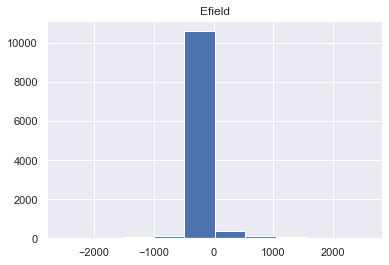

In [10]:
sentech_data.hist('Efield')

array([[<AxesSubplot:title={'center':'Air_temp'}>]], dtype=object)

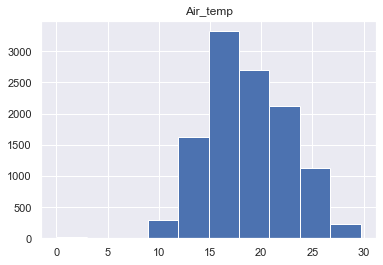

In [11]:
sentech_data.hist('Air_temp')

array([[<AxesSubplot:title={'center':'DewPoint'}>]], dtype=object)

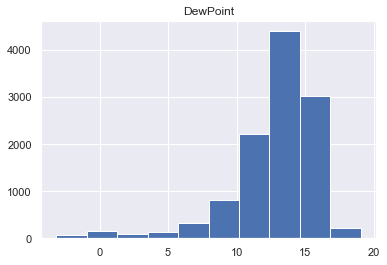

In [12]:
sentech_data.hist('DewPoint')

array([[<AxesSubplot:title={'center':'RH'}>]], dtype=object)

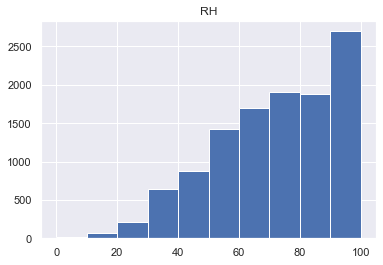

In [13]:
sentech_data.hist('RH')

array([[<AxesSubplot:title={'center':'Air_temp'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'DewPoint'}>,
        <AxesSubplot:title={'center':'Efield'}>],
       [<AxesSubplot:title={'center':'Lightning_Warnings'}>,
        <AxesSubplot:>]], dtype=object)

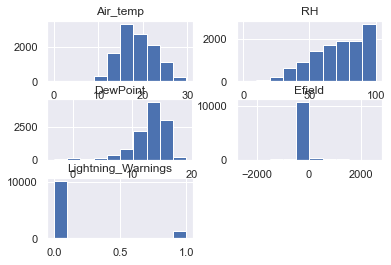

In [14]:
sentech_data.hist()

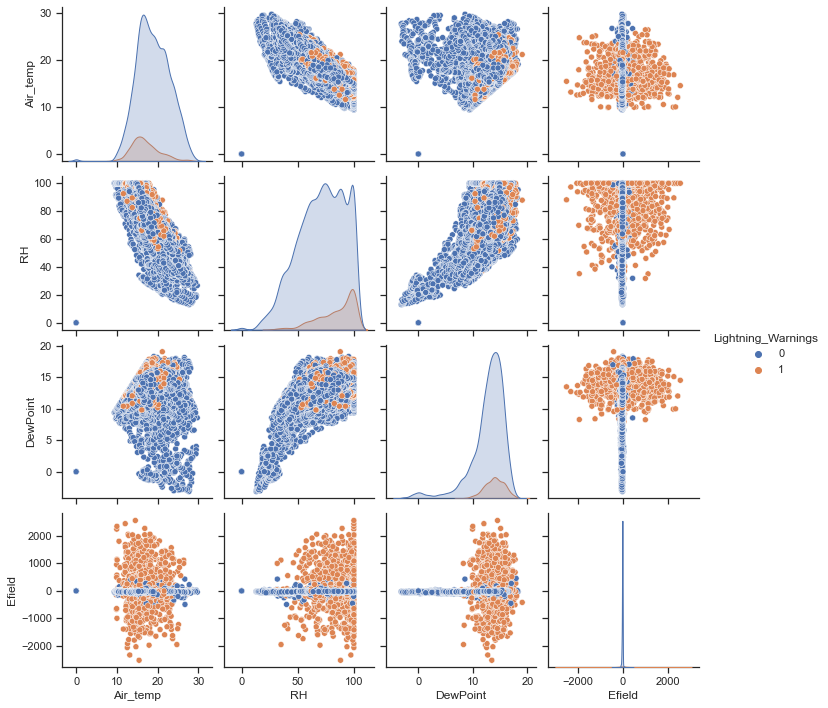

In [15]:
sns.set(style="ticks")
sns.pairplot(sentech_data, hue = 'Lightning_Warnings')

<AxesSubplot:>

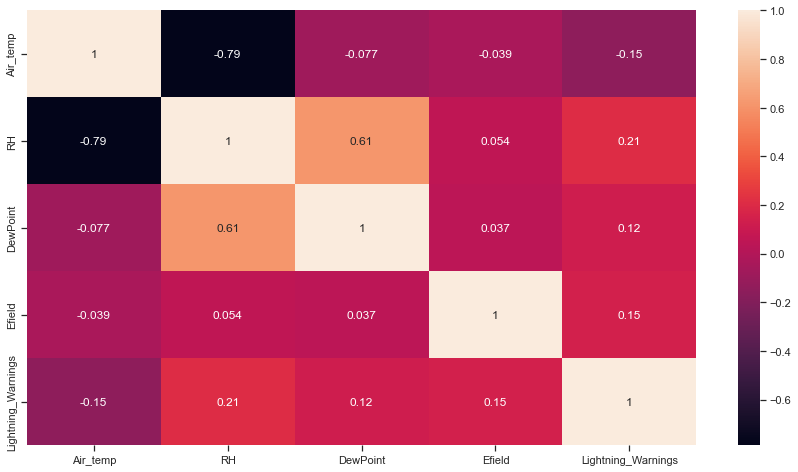

In [16]:
plt.figure(figsize= (15,8))
sns.heatmap(sentech_data.corr(), annot= True)

<AxesSubplot:>

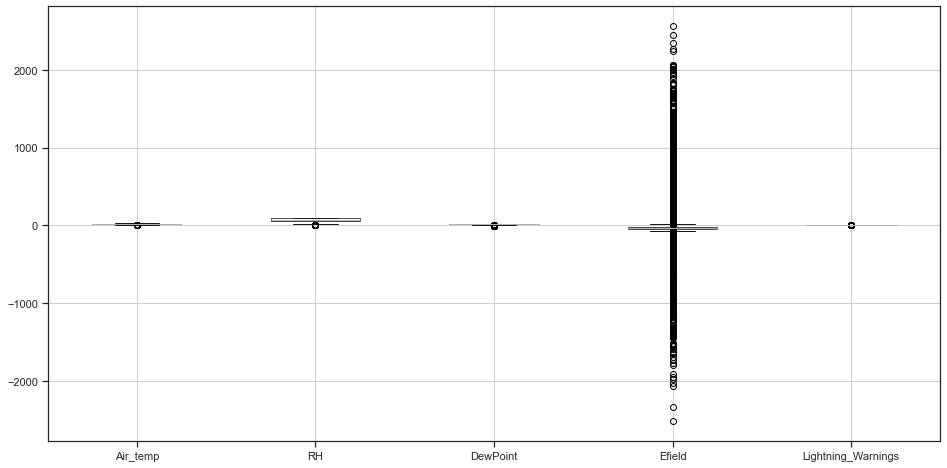

In [17]:
sentech_data.boxplot(figsize= (16,8))

**Outlier Treatment**

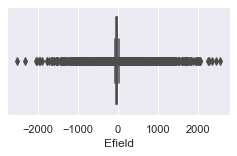

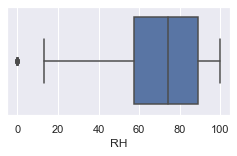

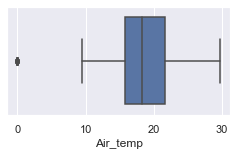

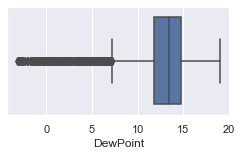

In [18]:
sns.set(style = "whitegrid")
sns.set(rc= {'figure.figsize': (4,2)})
sns.boxplot(x= sentech_data['Efield'])
plt.show()
sns.boxplot(x= sentech_data['RH'])
plt.show()
sns.boxplot(x= sentech_data['Air_temp'])
plt.show()
sns.boxplot(x= sentech_data['DewPoint'])
plt.show()

In [19]:
#Removing outliers for Dew Point
Q1= sentech_data.quantile(0.25)
Q3= sentech_data.quantile(0.75)
IQR= Q3- Q1
print("\n---IQR---\n", IQR) ##Printing the normal range  for each feature. 


---IQR---
 Air_temp               5.841925
RH                    31.549865
DewPoint               3.023672
Efield                21.961238
Lightning_Warnings     0.000000
dtype: float64


In [20]:
#Lower range
print("\n---Lower Range---\n", (Q1- 1.5*IQR))


---Lower Range---
 Air_temp               6.978187
RH                    10.374915
DewPoint               7.233666
Efield               -74.357571
Lightning_Warnings     0.000000
dtype: float64


In [21]:
#Higher range
print("\n---Higher Range---\n", (Q3+ 1.5*IQR)) 


---Higher Range---
 Air_temp               30.345888
RH                    136.574375
DewPoint               19.328356
Efield                 13.487379
Lightning_Warnings      0.000000
dtype: float64


In [22]:
sentech_data.describe()

,Air_temp,RH,DewPoint,Efield,Lightning_Warnings
count,11424.000000,11424.000000,11424.000000,11424.000000,11424.000000
mean,18.666664,72.062334,12.800516,-19.896693,0.108456
std,3.976131,20.536398,3.133315,236.639048,0.310969
min,0.000000,0.000000,-3.143647,-2523.927000,0.000000
25%,15.741075,57.699713,11.769175,-41.415715,0.000000
50%,18.310145,74.093910,13.449530,-29.795150,0.000000
75%,21.583000,89.249578,14.792847,-19.454477,0.000000
max,29.734370,99.980700,19.050590,2562.246000,1.000000


**Removing the Outliers (Or NOT)**

In [23]:
print((sentech_data< (Q1- 1.5*IQR)) | (sentech_data> (Q3+ 1.5*IQR)))

       Air_temp     RH  DewPoint  Efield  Lightning_Warnings
0         False  False      True   False               False
1         False  False     False   False               False
2         False  False     False   False               False
3         False  False     False   False               False
4         False  False     False   False               False
...         ...    ...       ...     ...                 ...
11419     False  False     False   False               False
11420     False  False     False   False               False
11421     False  False     False   False               False
11422     False  False     False   False               False
11423     False  False     False   False               False

[11424 rows x 5 columns]


**Split the data**

In [24]:
from sklearn.model_selection import train_test_split  

In [25]:
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

**Train the classifier**

In [26]:
from sklearn import tree
model_entropy = tree.DecisionTreeClassifier(criterion = 'entropy')
model_gini = tree.DecisionTreeClassifier(criterion = 'gini')

In [27]:
model_entropy.fit(X_train, y_train)
model_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_predicted_entropy = model_entropy.predict(X_test)
y_predicted_gini = model_gini.predict(X_test)

**Model Results**

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
print('Train Accuracy:', accuracy_score(y_train, model_entropy.predict(X_train)))
print('Train Accuracy:', accuracy_score(y_train, model_gini.predict(X_train)))

Train Accuracy: 0.9998905788379473
Train Accuracy: 0.9998905788379473


In [31]:
print('Test Accuracy:', accuracy_score(y_test, y_predicted_entropy))
print('Test Accuracy:', accuracy_score(y_test, y_predicted_gini))

Test Accuracy: 0.9190371991247265
Test Accuracy: 0.9238512035010941


In [32]:
print(classification_report(y_test, y_predicted_entropy))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1997
           1       0.68      0.66      0.67       288

    accuracy                           0.92      2285
   macro avg       0.82      0.81      0.81      2285
weighted avg       0.92      0.92      0.92      2285



In [33]:
print(classification_report(y_test, y_predicted_gini))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1997
           1       0.71      0.66      0.69       288

    accuracy                           0.92      2285
   macro avg       0.83      0.81      0.82      2285
weighted avg       0.92      0.92      0.92      2285



In [34]:
print(confusion_matrix(y_test, y_predicted_gini))

[[1920   77]
 [  97  191]]


In [35]:
print(confusion_matrix(y_test, y_predicted_entropy))

[[1909   88]
 [  97  191]]


In [36]:
y_test.value_counts()

0    1997
1     288
Name: Lightning_Warnings, dtype: int64

In [37]:
unique_elements, counts_elements= np.unique(y_predicted_gini, return_counts= True)
print('Frequency of unique values (0,1)')
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values (0,1)
[[   0    1]
 [2017  268]]


In [38]:
unique_elements, counts_elements= np.unique(y_predicted_entropy, return_counts= True)
print('Frequency of unique values (0,1)')
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values (0,1)
[[   0    1]
 [2006  279]]


In [39]:
model_entropy.predict([[10,100,23,10]])

C:\Users\Oratile\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [40]:
def plot_roc(y_test,probs):
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.81


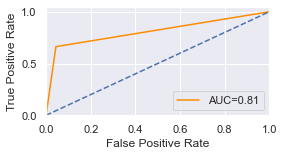

In [41]:
#Decision Tree
from sklearn.metrics import roc_curve,auc
plot_roc(y_test,y_predicted_entropy)

**Visualizing the Decision Tree**

In [42]:
from sklearn.tree import plot_tree

In [43]:
feature_cols= ['Air_temp', 'RH', 'DewPoint', 'Efield']

In [44]:
#plt.figure(figsize= (25,10))
#a= plot_tree(model_entropy, feature_names= feature_cols, class_names = ['0','1'],
    #filled= True,
    #rounded= True,
    #fontsize=14 )

In [45]:
#plt.savefig("decistion_tree.png")

**Reducing model Complexity and Level**

In [46]:
model_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)

In [47]:
simplier_model= model_entropy.fit(X_train, y_train)

In [48]:
y_pred= simplier_model.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1997
           1       0.85      0.68      0.75       288

    accuracy                           0.94      2285
   macro avg       0.90      0.83      0.86      2285
weighted avg       0.94      0.94      0.94      2285



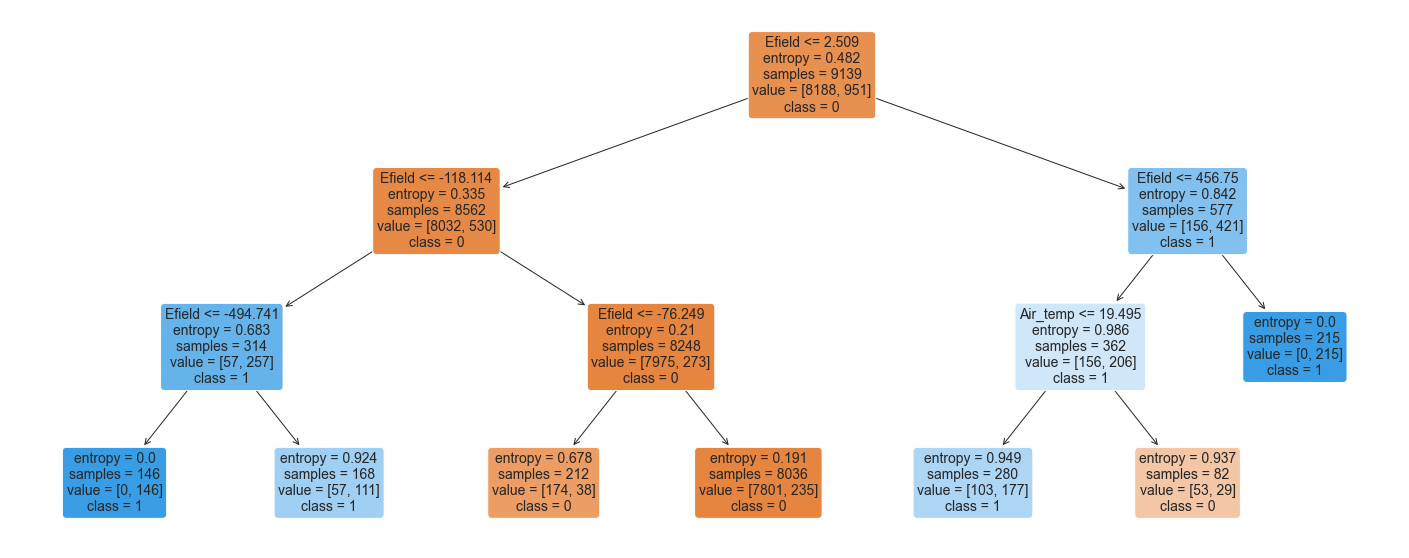

In [50]:
plt.figure(figsize= (25,10))
a= plot_tree(simplier_model, feature_names= feature_cols, class_names = ['0','1'],
    filled= True,
    rounded= True,
    fontsize=14 )

ROC AUC=0.83


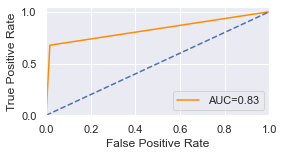

In [51]:
#ROC Curve
plot_roc(y_test,y_pred)

In [50]:
print(dict(zip(sentech_data.columns,simplier_model.feature_importances_ )))

{'Air_temp': 0.024098794728534455, 'RH': 0.020269176162558796, 'DewPoint': 0.013984944416655211, 'Efield': 0.9416470846922516}


**Custom Loss Function**

In [99]:
#F-1 Score
def f1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y.iloc[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y.iloc[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y.iloc[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y.iloc[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [52]:
y_test_numpy= y_test.to_numpy()

In [54]:
def mean_squared_error(act, pred):

   diff = pred - act
   differences_squared = diff ** 2
   mean_diff = differences_squared.mean()
   
   return mean_diff

print(mean_squared_error(act,pred))

0.04666666666666667


In [65]:
def mean_squared_errors_array(actual, pred):
    output = np.empty(len(actual))
    for i in range(len(actual)):
        diff = pred[i] - actual[i]
        differences_squared = diff ** 2
        output[i] = differences_squared.mean()
    return output

In [66]:
mean_squared_error(y_test_numpy, y_pred)

0.04245076586433261

In [67]:
mean_squared_errors_array(y_test_numpy, y_pred)

array([0., 0., 0., ..., 0., 0., 0.])

In [100]:
f1_score(y_test,y_pred)

0.7450980392156863

In [102]:
#Self- Defined Precision
def precision(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y.iloc[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y.iloc[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y.iloc[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y.iloc[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return precision

In [103]:
precision(y_test,y_pred)

0.8382352941176471

In [104]:
#Self- Defined Recall
def recall(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y.iloc[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y.iloc[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y.iloc[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y.iloc[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return recall

In [105]:
recall(y_test,y_pred)

0.6705882352941176